<a href="https://colab.research.google.com/github/ali-rn/project-3/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/ali-rn/project-3

Cloning into 'project-3'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 240 (delta 23), reused 3 (delta 3), pack-reused 184 (from 1)
Receiving objects: 100% (240/240), 23.22 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
# prompt: metrics_path = 'project-3/DATA/deep_results.csv'
# given this metrics path, create a dataframe

import pandas as pd

metrics_path = 'project-3/DATA/deep_results.csv'
df = pd.read_csv(metrics_path)
#rename "dsc" to "dice"
df = df.rename(columns={'dsc': 'dice'})
df

,slice,dice,surface_dsc,precision,recall
0,case_00000_slice000.npy,NaN,NaN,0.0,0.0
1,case_00000_slice001.npy,NaN,NaN,0.0,0.0
2,case_00000_slice002.npy,NaN,NaN,0.0,0.0
3,case_00000_slice003.npy,NaN,NaN,0.0,0.0
4,case_00000_slice004.npy,NaN,NaN,0.0,0.0
...,...,...,...,...,...
4261,case_00108_slice046.npy,NaN,NaN,0.0,0.0
4262,case_00108_slice047.npy,NaN,NaN,0.0,0.0
4263,case_00108_slice048.npy,NaN,NaN,0.0,0.0
4264,case_00108_slice049.npy,NaN,NaN,0.0,0.0


In [ ]:
# given this metrics path, create a dataframe

import pandas as pd

metrics_path = 'project-3/SCRIPTS/nnUNet/unet_test_metrics.csv'
gf = pd.read_csv(metrics_path)
gf

,slice,dice,precision,recall
0,case_00000_slice000.npy,2.000000e-07,0.0,0.0
1,case_00000_slice001.npy,1.000000e+00,0.0,0.0
2,case_00000_slice002.npy,1.000000e+00,0.0,0.0
3,case_00000_slice003.npy,4.999998e-07,0.0,0.0
4,case_00000_slice004.npy,4.999998e-07,0.0,0.0
...,...,...,...,...
4261,case_00108_slice046.npy,4.999998e-07,0.0,0.0
4262,case_00108_slice047.npy,3.333332e-07,0.0,0.0
4263,case_00108_slice048.npy,2.433090e-09,0.0,0.0
4264,case_00108_slice049.npy,3.448276e-08,0.0,0.0


<ipython-input-21-b7faeceed357>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(model_names)
<ipython-input-21-b7faeceed357>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(model_names)
<ipython-input-21-b7faeceed357>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(model_names)


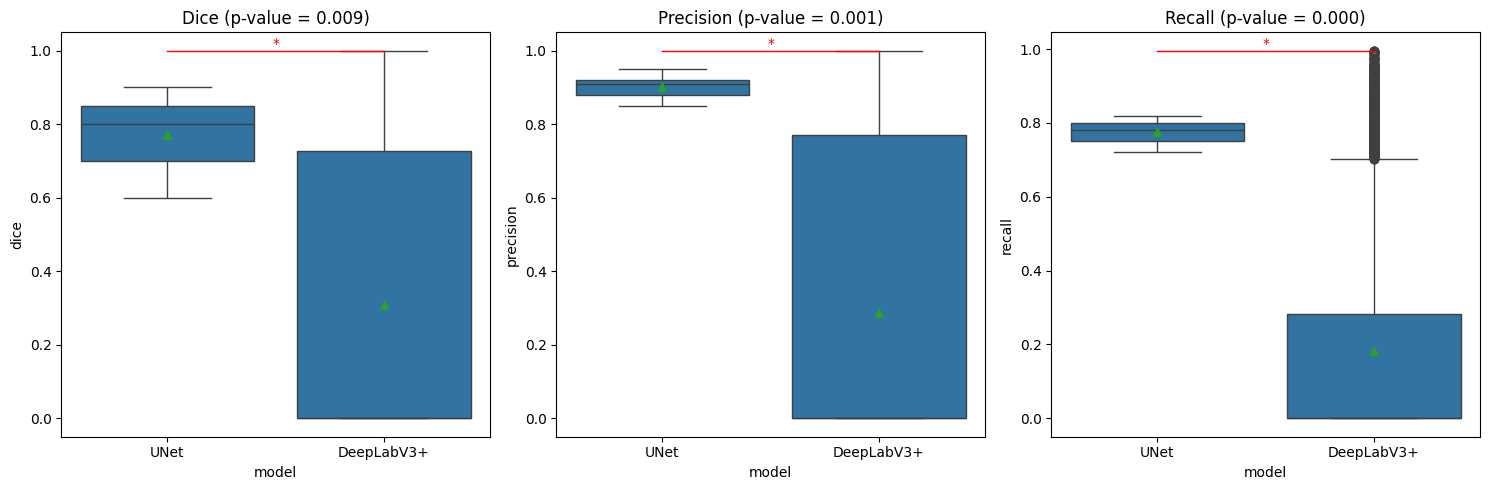

In [ ]:
# prompt: Using dataframe gf: create a comparitive boxplot showing t-test significance, comparing all four columns of df and gf. add bars that show significance on the plot
# also name gf boxplots "UNet" and df boxplots "DeepLabV3+"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is another dataframe similar to 'gf'
# Replace this with your actual dataframes and column names if needed.

# Combine dataframes for plotting
data = pd.concat([df,gf])

# Create a comparative boxplot for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # Adjust the number of subplots and figsize

metrics = ["dice", "precision", "recall"]  # Replace with the actual metric column names
model_names = ["UNet", "DeepLabV3+"] # Name the boxes


for i, metric in enumerate(metrics):
  # Create boxplot
  sns.boxplot(ax=axes[i], x='model', y=metric, data=data, showmeans=True)

  # Calculate t-test p-values
  df_metric = df[metric]
  gf_metric = gf[metric]
  t_statistic, p_value = stats.ttest_ind(df_metric, gf_metric)

  axes[i].set_title(f"{metric.capitalize()} (p-value = {p_value:.3f})")
  axes[i].set_xticklabels(model_names)

  # Add significance bars (example for p<0.05)
  if p_value < 0.05:
      y = max(df_metric.max(), gf_metric.max())
      axes[i].plot([0,1], [y, y], linewidth=1, color='red')
      axes[i].text(0.5,y, "*", ha='center', va='bottom', color='red')


plt.tight_layout()
plt.show()


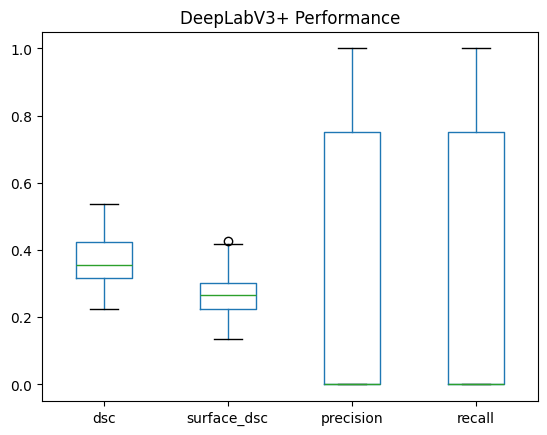

In [ ]:
import matplotlib.pyplot as plt

# Method 1: Using DataFrame.boxplot
df.boxplot(column=['dsc', 'surface_dsc', 'precision', 'recall'])
plt.title('DeepLabV3+ Performance')
plt.grid(False)
plt.show()